<a href="https://colab.research.google.com/github/0906Bao/TriTueNhanTao/blob/main/Tuan05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [70]:
means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3
X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis = 0)

In [71]:
def kmeans_init_centers(X, n_cluster):
  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

In [72]:
def kmeans_predict_labels(X, centers):
  D = cdist(X, centers)
  return np.argmin(D, axis = 1)

In [73]:
def kmeans_update_centers(X, labels, centers):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range (n_cluster):
    Xk = X[labels == k, :]
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

In [74]:
def kmeans_has_converged(centers, new_centers):
  return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [75]:
def kmeans_Visualize(X, centers, labels, n_cluster, title):
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt_color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    for i in range(n_cluster):
        data = X[labels == i]
        plt.plot(data[:, 0], data[:, 1], plt_color[i] + '^', markersize=4, label='cluster_' + str(i))
        plt.plot(centers[i][0], centers[i][1], plt_color[i + 4] + 'o', markersize=10, label='center_' + str(i))
    plt.legend()
    plt.show()

In [76]:
def kmeans(innit_centers, init_labels, X, n_cluster):
  centers = innit_centers
  labels = init_labels
  times = 0
  while 1:
    labels = kmeans_predict_labels(X, centers)
    kmeans_Visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' +str(times + 1))
    new_centers = kmeans_update_centers(X, labels, n_cluster)
    if kmeans_has_converged(centers, new_centers):
      break
    centers = new_centers
    kmeans_Visualize(X, centers, labels, n_cluster, 'Update center position at time = ' + str(times + 1))
    times += 1
  return (centers, labels, times)

[[ 5.24122964  9.37597172]
 [10.71579961  4.04324259]
 [10.62019692  2.48758347]]


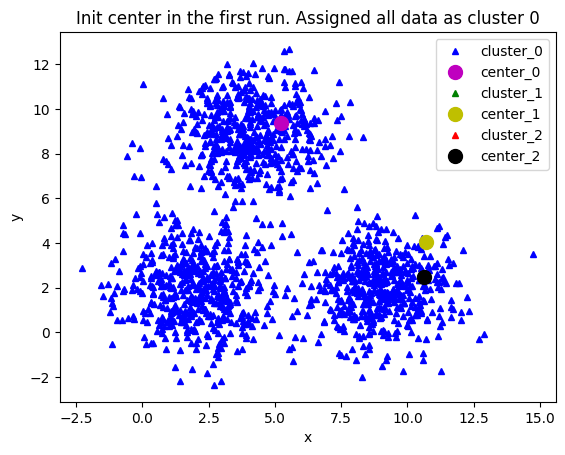

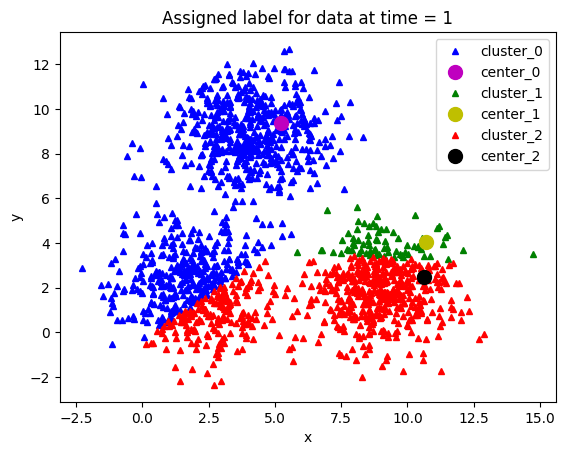

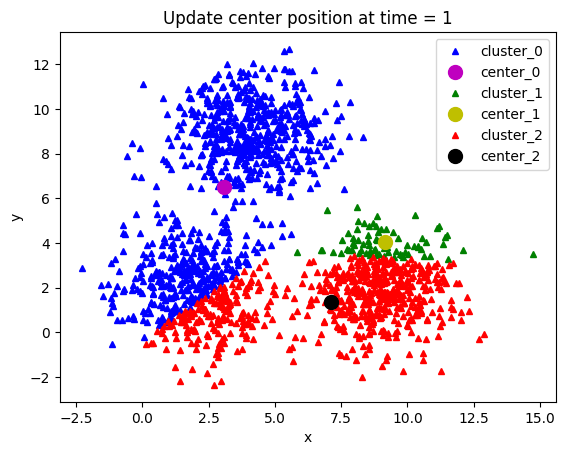

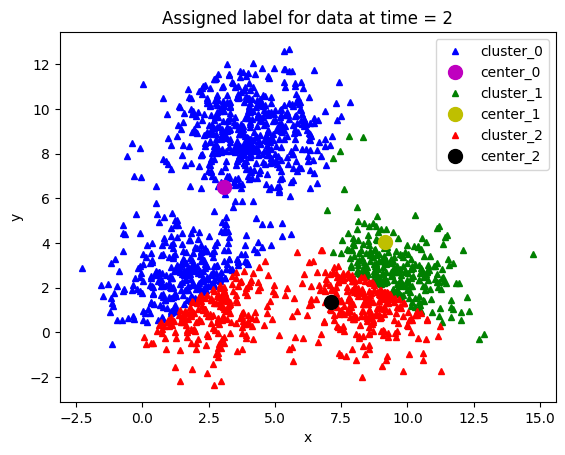

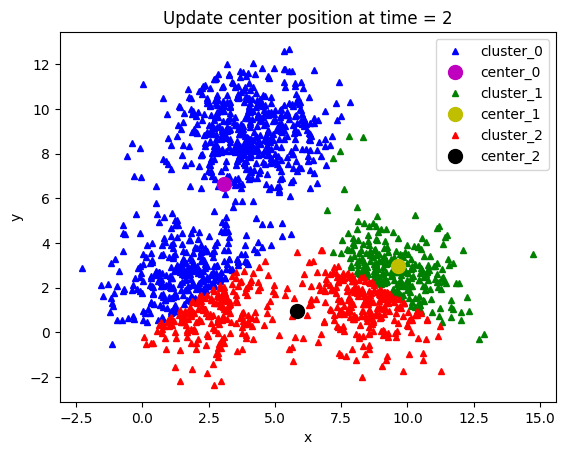

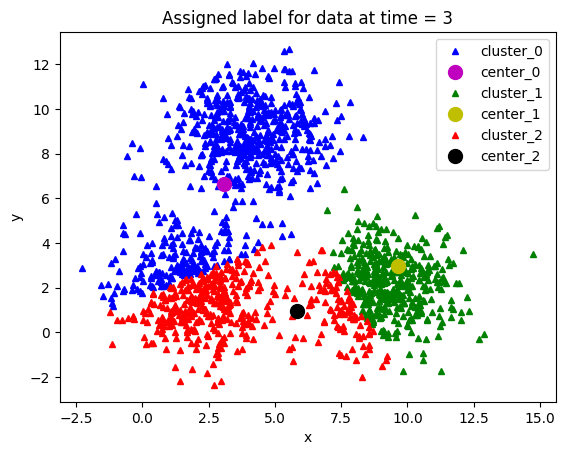

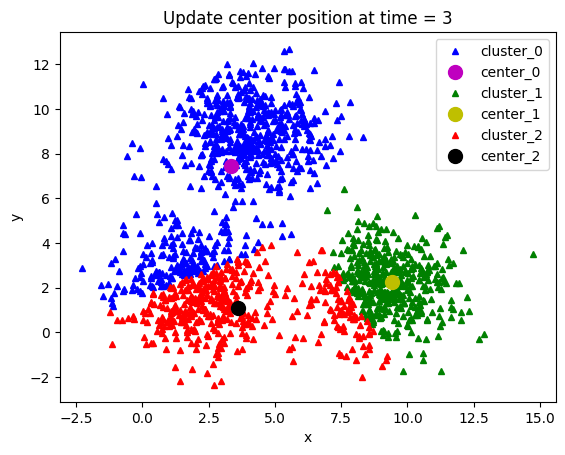

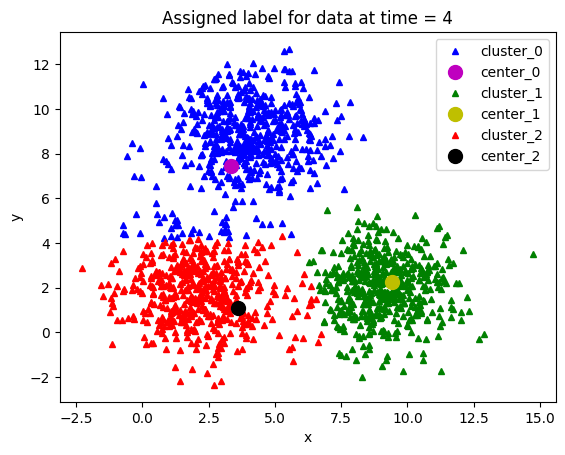

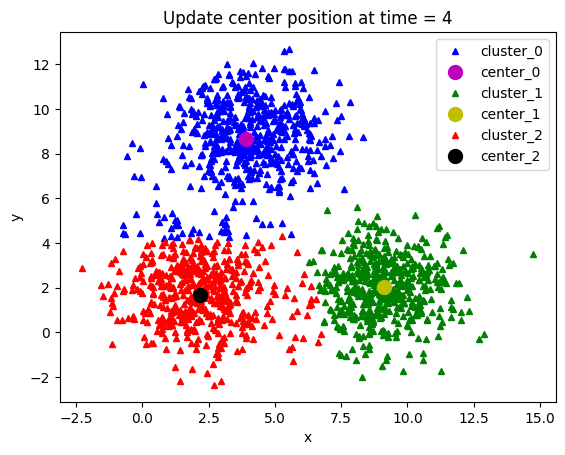

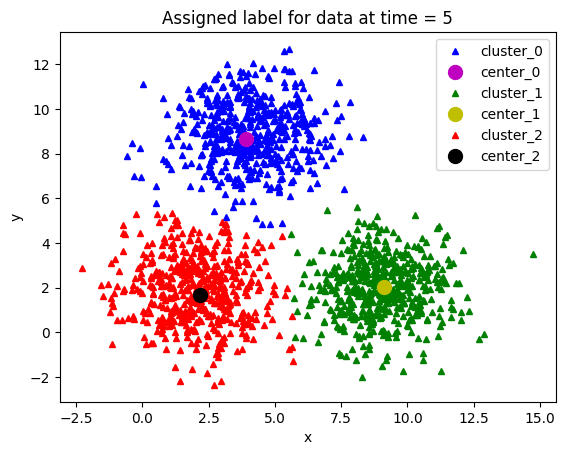

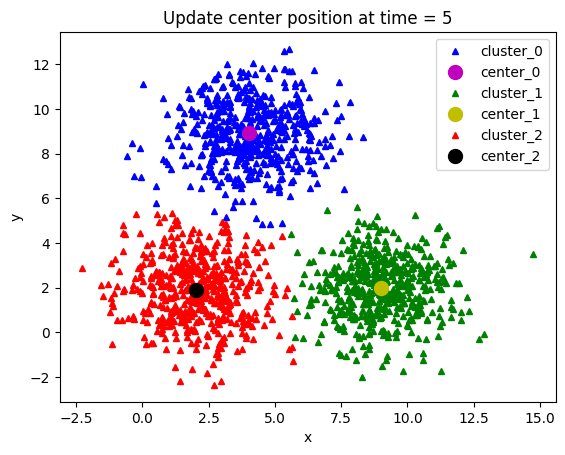

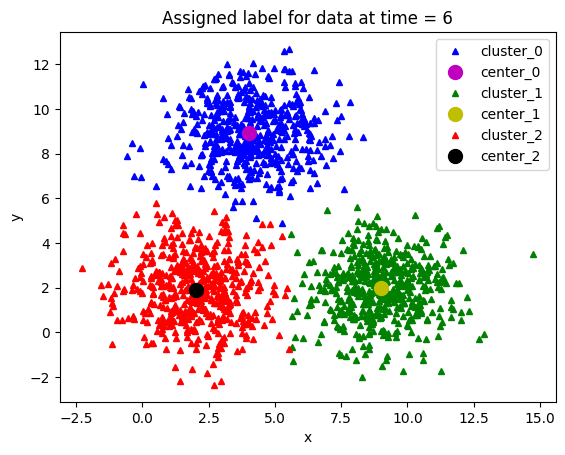

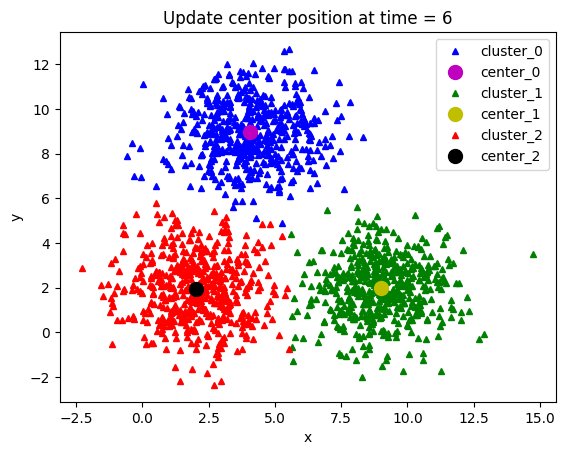

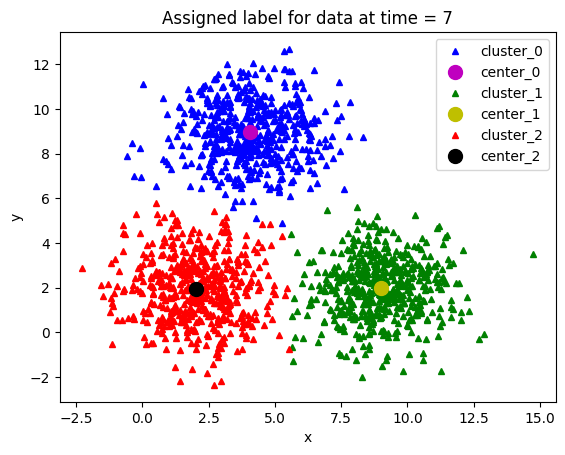

Done! Kmeans has converged after 6 times
[[4.04745415 8.96223707]
 [8.98566529 1.98227145]
 [2.01857079 1.94055339]]


In [77]:
if __name__ == '__main__':
  innit_centers = kmeans_init_centers(X, n_cluster)
  print(innit_centers)
  innit_labels = np.zeros(X.shape[0])
  kmeans_Visualize(X, innit_centers, innit_labels, n_cluster, 'Init center in the first run. Assigned all data as cluster 0')
  centers, labels, times, = kmeans(innit_centers, innit_labels, X, n_cluster)
  print('Done! Kmeans has converged after', times, 'times')
  print(centers)